# Project: Titanic Passenger Data Analysis
Project Goal
The goal of this project is to explore, clean, and process Titanic passenger data, identify key factors influencing survival, and visualize the findings.


In [1]:
# importing pandas as pd varable
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.  Exploratory Data Analysis (EDA)
   ### • Import data from train.csv, test.csv, and gender_submission.csv files.


In [2]:
# To read all csv files
train= pd.read_csv('./Data/train.csv')
test = pd.read_csv('./Data/test.csv')
gender_submission= pd.read_csv('./Data/gender_submission.csv')

### • Perform initial exploration using .head(), .info(), and .describe() to understand data structure, check for missing values, and get a basic statistical overview.

### Info train 

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.shape

(891, 12)

In [7]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
train.isnull().sum()
#  

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### info test.csv file

In [11]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [13]:
test.shape

(418, 11)

In [14]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [15]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


### Info gender_submission.csv file

In [17]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [18]:
gender_submission.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [19]:
gender_submission.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [20]:
gender_submission.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

In [21]:
gender_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


## 2.  Data Cleaning
### • Handling Missing Values:
   - Age: Fill missing values with the median or mean based on passenger class and gender.
   - Embarked: Fill missing values with the most frequent value.
   - Cabin: Consider using only the first letter of the cabin or removing the column if it has limited analytical value.
   - Fare: Check for missing values and fill them with the median.

### • Outlier Treatment:
   - Identify potential outliers in Age and Fare, and determine appropriate handling (e.g., capping values or excluding outliers).

In [22]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [24]:
test_survived = pd.merge(gender_submission,test,how='outer')

In [25]:
all_df= pd.merge(train, test_survived, how='outer')

In [26]:
all_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
all_df.shape

(1309, 12)

In [28]:
all_df= all_df.drop(columns=['Cabin'])

In [29]:
all_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [30]:
all_df.Sex.value_counts()

Sex
male      843
female    466
Name: count, dtype: int64

In [31]:
def f_apply(n):
    if n=='male':
        return 1
    elif n== 'female':
        return 0
all_df.Sex = all_df.Sex.map(lambda sex: f_apply(sex))

In [32]:
all_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1304,1305,0,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,0,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,S
1308,1309,0,3,"Peter, Master. Michael J",1,NaN,1,1,2668,22.3583,C


In [33]:
all_df.Age.unique()
# Here, there are values ​​smaller than 0 and float type numbers, they should be corrected.
#  Otherwise, it will allow us to work with the information later

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  , 22.5 ,
       18.5 , 67.  , 76.  , 26.5 , 60.5 , 11.5 ,  0.33,  0.17, 38.5 ])

In [34]:
def f_adaptation(num):
    if num<1 and num>0:
        return num*100
    elif num>1:
        return round(num)
    

all_df.Age = all_df.Age.map(lambda age:f_adaptation(age))

In [35]:
all_df.Age.unique()

array([22., 38., 26., 35., nan, 54.,  2., 27., 14.,  4., 58., 20., 39.,
       55., 31., 34., 15., 28.,  8., 19., 40., 66., 42., 21., 18.,  3.,
        7., 49., 29., 65.,  5., 11., 45., 17., 32., 16., 25., 83., 30.,
       33., 23., 24., 46., 59., 71., 37., 47., 70., 12.,  9., 36., 51.,
       56., 44., 61., 50., 62., 41., 52., 63., 92., 43., 60., 10., 64.,
       13., 48., 75., 53., 57., 80.,  6., 67., 74., 76.])

###  Age Column: Fill in the blanks with the median or mean value depending on the passenger class and gender.

In [36]:
all_df.Pclass.unique()

array([3, 1, 2])

In [37]:
all_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [38]:
def f_df_mean (index_i):
    result= all_df[(all_df.Pclass==all_df.iloc[index_i].Pclass)&(all_df.Sex==all_df.iloc[index_i].Sex)&(all_df.Embarked==all_df.iloc[index_i].Embarked)].Age.median()


    return round(result)

# all_df.iloc[1]
age_isna = all_df.Age.isna()
# print(age_isna[])
for i in range(all_df.shape[0]):
    if age_isna[i]:
        value= f_df_mean(i)
        all_df.loc[i,'Age']=value



In [39]:
all_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [40]:
all_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       2
dtype: int64

In [41]:
all_df.Fare=all_df.Fare.fillna(all_df.Fare.median())

In [42]:
all_df.Embarked.value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [43]:
all_df.Embarked=all_df.Embarked.fillna('S')

In [44]:
all_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [45]:
all_df.Age=all_df.Age.astype('int64')


In [46]:
all_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,S


## 3. Feature Engineering
    • Extract passenger titles from the Name column and create a new feature (Title) to see its impact on survival.
    



In [47]:
titles=all_df.Name.map(lambda name: name.split(',')[0]) 
# A new array is created using the split() method

In [48]:
Title = pd.Series(titles)
# A Series named Title has been created

In [49]:
# Added new Seres to all_df using inset() method
all_df.insert(4,'Title',Title)

In [50]:
all_df.head()

,PassengerId,Survived,Pclass,Name,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",Braund,1,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Cumings,0,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",Heikkinen,0,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Futrelle,0,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",Allen,1,35,0,0,373450,8.0500,S


• Create a FamilySize feature based on the number of relatives onboard (SibSp and Parch).

In [51]:
sizes = []
def contractions_df (index_i):
    result= all_df[(all_df.SibSp==all_df.iloc[index_i].SibSp)&(all_df.Parch==all_df.iloc[index_i].Parch)&(all_df.Title==all_df.iloc[index_i].Title)].Name.value_counts().sum()


    return round(result)


for i in range(all_df.shape[0]):
   sizes.append(contractions_df(i))
    

In [52]:
FamilySize= pd.Series(sizes)

In [53]:
all_df.insert(5,'FamilySize',FamilySize)

In [54]:
all_df.head()

,PassengerId,Survived,Pclass,Name,Title,FamilySize,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",Braund,2,1,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Cumings,2,0,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",Heikkinen,1,0,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Futrelle,2,0,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",Allen,2,1,35,0,0,373450,8.0500,S


• Add a binary feature, IsAlone, indicating whether a passenger traveled alone.

In [55]:
all_df['IsAlone'] = all_df.FamilySize.apply(lambda size: ( 1) if size==1 else  0)

In [56]:
all_df.head()

,PassengerId,Survived,Pclass,Name,Title,FamilySize,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",Braund,2,1,22,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Cumings,2,0,38,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",Heikkinen,1,0,26,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Futrelle,2,0,35,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",Allen,2,1,35,0,0,373450,8.0500,S,0


In [57]:
all_df.to_csv('./New_data/all_dataFrame.csv')

## 4. Data Visualization
• Perform analysis on survival factors using the following visualizations:
      - Survival Histogram: Display the distribution of survivors vs. non-survivors.
  

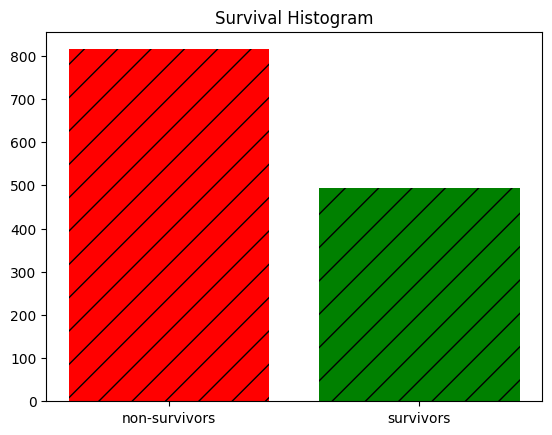

In [58]:
issurvived = all_df.Survived.value_counts().to_numpy()
all_survived =all_df[all_df.Survived==1]


bars =plt.bar(['non-survivors','survivors'], issurvived, color=['r','g'])
plt.title('Survival Histogram')
bars[0].set_hatch('/')
bars[1].set_hatch('/')




- Age Distribution Histogram: Show age distribution among survivors and non-survivors.

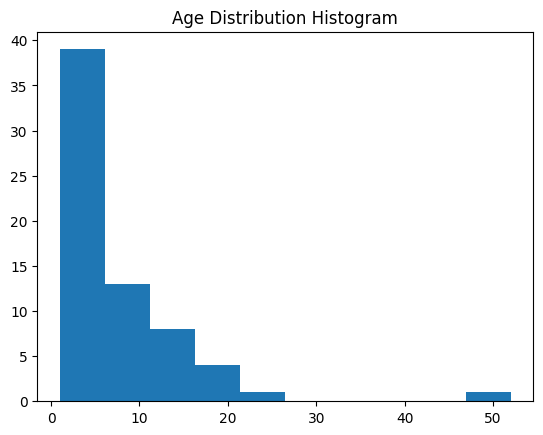

<Figure size 1000x400 with 0 Axes>

In [59]:
survivedAge = all_df[all_df.Survived==1].Age.value_counts()
plt.hist(survivedAge)
plt.title('Age Distribution Histogram')
plt.figure(figsize=(10,4))
plt.show()


 - Box Plot of Fare by Class and Survival: Show Fare spread across classes and survival status.

[Text(0.5, 1.0, 'Box Plot of Fare by Class and Survival')]

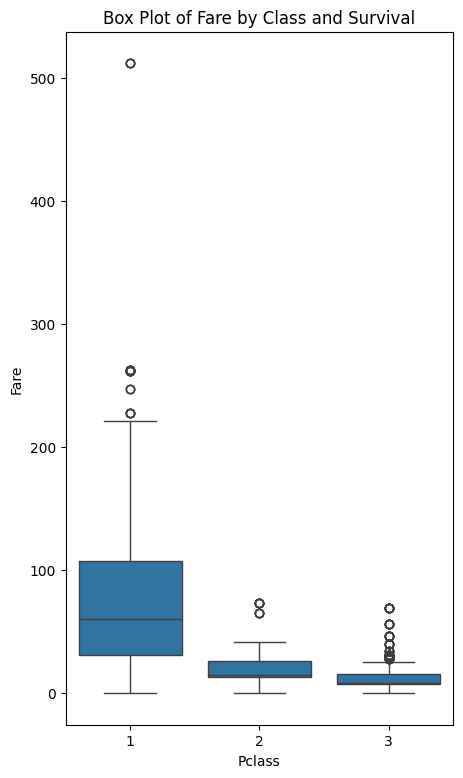

In [60]:
plt.figure(figsize=(5, 9))
top_countries = all_df['Pclass'].value_counts().head(10).index
sns.boxplot(data=all_df[all_df['Pclass'].isin(top_countries)], x='Pclass', y='Fare').set(title='Box Plot of Fare by Class and Survival')

- Bar Chart for Class and Gender (Pclass, Sex): Compare survival rates across classes for males and females.

In [61]:
# all_df.head()
a_pclass=[1,2,3]
df_male_and_female=all_df[all_df.Survived==1]
df_male_and_female_survived= df_male_and_female.loc[:,[ 'Pclass','Sex']].sort_values(['Pclass'])
df_male_survived = df_male_and_female_survived[df_male_and_female_survived.Sex==1].sort_values(['Pclass']).value_counts(['Pclass','Sex']).to_numpy()
df_female_survived = df_male_and_female_survived[df_male_and_female_survived.Sex==0].sort_values(['Pclass']).value_counts(['Pclass','Sex']).to_numpy()
df_difference=df_female_survived-df_male_survived

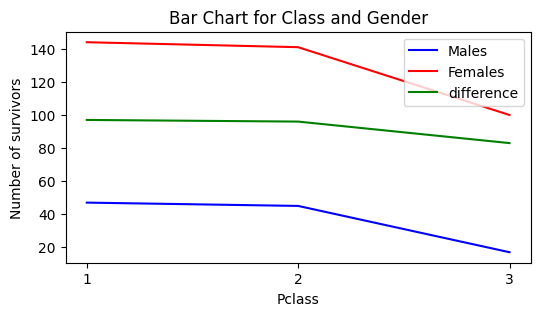

In [62]:

plt.figure(figsize=(6,3),dpi=100)
plt.plot(a_pclass, df_male_survived,'b' ,label='Males' )
plt.plot(a_pclass,df_female_survived,'r' ,label='Females' )
plt.plot(a_pclass,df_difference,'g' ,label='difference' )
plt.title("Bar Chart for Class and Gender")
plt.xlabel("Pclass")
plt.ylabel("Number of survivors")
plt.xticks([1, 2, 3])

plt.legend()
plt.show()

- Grouped Bar Chart for FamilySize and Survival: Show the impact of family size on survival
  

[Text(0.5, 1.0, 'Grouped Bar Chart for FamilySize and Survival')]

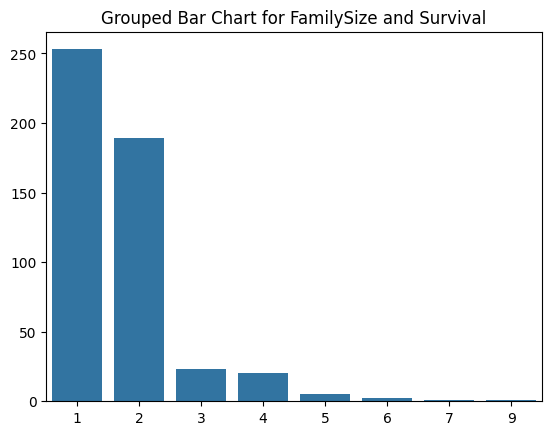

In [63]:
catigory_fammlySyze=all_df['FamilySize'].sort_values().unique()
familiSize_survived = all_survived.sort_values(['FamilySize']).loc[: , ['FamilySize', 'Survived']].value_counts().to_numpy()

sns.barplot(x=catigory_fammlySyze,y=familiSize_survived).set(title='Grouped Bar Chart for FamilySize and Survival')

- Pie Chart for Embarked: Display the survival and non-survival percentages by embarkation point.


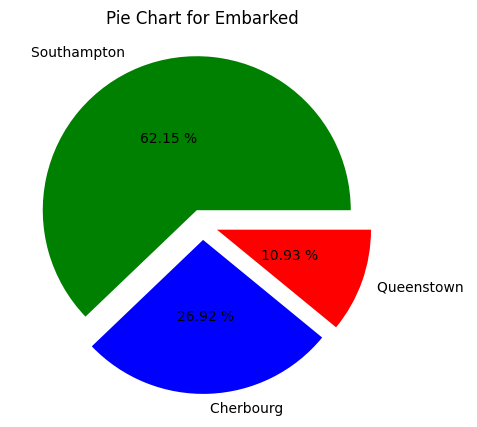

In [64]:
embarked_countse = all_survived['Embarked'].sort_values().value_counts()
embarked_colors = ['g','b','r']
embarked_classes = ['Southampton  ','Cherbourg ','Queenstown ']


plt.figure(figsize=(7,5),dpi=100)
plt.pie(embarked_countse, labels=embarked_classes, colors=embarked_colors , autopct='%.2f %%' ,pctdistance=0.5,explode=[.1,.1,.1,])
plt.title('Pie Chart for Embarked')

plt.show()



- Scatter Plot: Display the relationship between Age and Fare, with color indicating survival status.

[Text(0.5, 1.0, 'Relationship between Age and Fare')]

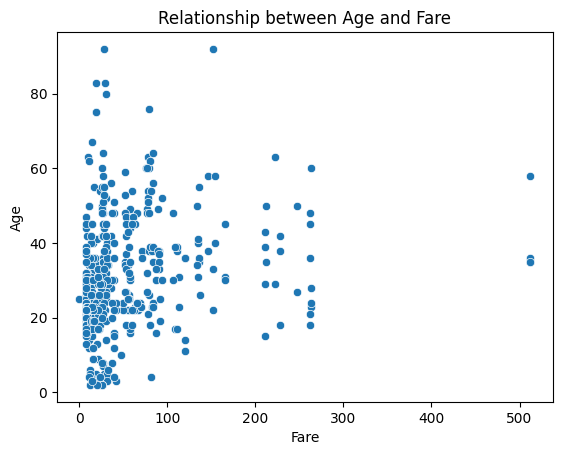

In [65]:
sns.scatterplot(x=all_survived.Fare, y=all_survived.Age).set(title='Relationship between Age and Fare')

- Correlation Heatmap: Create a correlation matrix for numerical variables to uncover relationships between features.

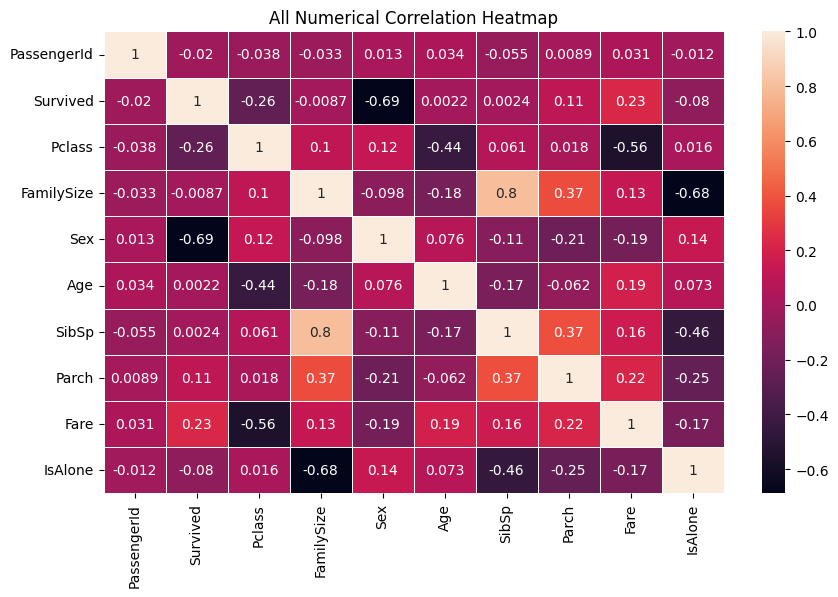

In [66]:
numerc_data = all_df.select_dtypes(include=['number'])


df_corrr = numerc_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(df_corrr,annot=True, linewidths=0.5)
plt.title('All Numerical Correlation Heatmap')
plt.show()

## 5.Data Aggregation & Grouping
- Group data by features like Pclass, Sex, Embarked, and FamilySize to analyze average survival rates within each group.


In [67]:
def f_to_embarked(embarked):
    if embarked == 'C':  # Embarked C = 1  
        return 1         
    elif embarked =='Q': # Embarked Q = 2
        return 2
    elif embarked== 'S': # Embarked S = 3
        return 3



all_group_data = all_df.loc[:, ['Survived','Pclass','Sex','Embarked','FamilySize']]

all_group_data.Embarked = all_group_data.Embarked.map(lambda emb:f_to_embarked(emb) )


all_group_data.loc['Survived'] = all_group_data['Survived'].astype('category')
all_group_by_Survived = all_group_data.groupby(['Pclass', 'Sex', 'Embarked', 'FamilySize'])['Survived']


all_group_by_Survived.mean()

Pclass  Sex  Embarked  FamilySize
1.0     0.0  1.0       1.0           0.970588
                       2.0           1.000000
                       3.0           1.000000
             2.0       2.0           1.000000
             3.0       1.0           1.000000
                                       ...   
3.0     1.0  3.0       4.0           0.066667
                       5.0           0.100000
                       6.0           0.000000
                       7.0           0.000000
                       9.0           0.000000
Name: Survived, Length: 66, dtype: float64

In [68]:
all_group_by_Pclass = all_group_data.groupby('Pclass')


all_group_by_Pclass.mean()

,Survived,Sex,Embarked,FamilySize
Pclass,,,,
1.0,0.575851,0.554180,2.117647,1.569659
2.0,0.422383,0.617329,2.772563,1.541516
3.0,0.269394,0.695346,2.555712,1.834979


In [69]:
all_group_by_Sex = all_group_data.groupby('Sex')


all_group_by_Sex.mean()

,Survived,Pclass,Embarked,FamilySize
Sex,,,,
0.0,0.82618,2.154506,2.386266,1.862661
1.0,0.12930,2.372479,2.552788,1.621590


In [70]:
all_group_by_Embarked = all_group_data.groupby('Embarked')


all_group_by_Embarked.mean()

,Survived,Pclass,Sex,FamilySize
Embarked,,,,
1.0,0.492593,1.851852,0.581481,1.533333
2.0,0.439024,2.894309,0.512195,1.747967
3.0,0.335153,2.344978,0.680131,1.753275


In [71]:
all_group_by_FamilySize = all_group_data.groupby('FamilySize')


all_group_by_FamilySize.mean()

,Survived,Pclass,Sex,Embarked
FamilySize,,,,
1.0,0.343284,2.306649,0.701493,2.515604
2.0,0.456522,2.157005,0.560386,2.374396
3.0,0.333333,2.650000,0.700000,2.533333
4.0,0.410714,2.267857,0.464286,2.803571
5.0,0.250000,2.950000,0.800000,2.600000
6.0,0.166667,3.000000,0.666667,3.000000
7.0,0.285714,3.000000,0.142857,3.000000
9.0,0.111111,3.000000,0.555556,3.000000


- Use grouping and sorting to analyze relationships between ticket price and class (Pclass) as well as between family size and survival.

<Axes: xlabel='Pclass', ylabel='Fare'>

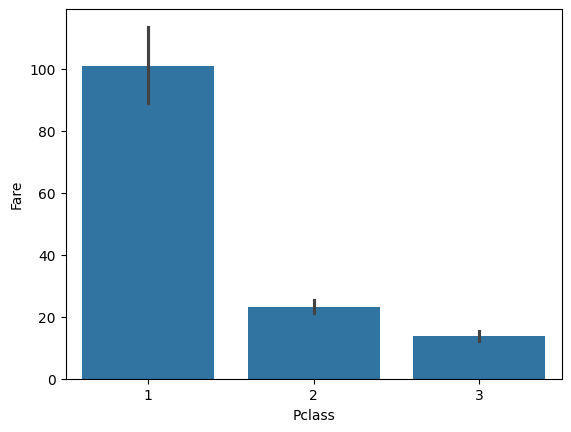

In [72]:
sns.barplot(x=all_survived.Pclass, y=all_survived.Fare)

<Axes: xlabel='FamilySize', ylabel='Fare'>

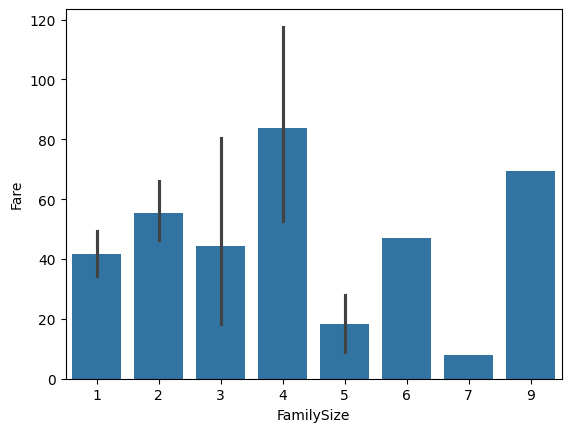

In [73]:
sns.barplot(x=all_survived.FamilySize, y=all_survived.Fare)

## 6 Report Preparation
1. In this section, three csv files are converted to variables and this data was studied to see what it was made of.During the learning process, it became clear that these three CSV files are related to each other.
2. I merged the three datasets to create a single unified dataset. Since I couldn't fully recover the data in the 'Cabin' column, I decided to remove it.I divided the data in the category "Sex" column into 1 and 0 in the comparison.I fixed the incorrect age types in the "Age" column.I replaced the NaNs in the "Age" column with the median of the corresponding values ​​in the "Pclass" and "Sex" columns.Next, I worked with the NaNs in the data, filling in the median and maximum values ​​for the NaNs in the "Fare" and "Embarked" columns. I changed the data in the "Age" column to "int64" type to avoid any confusion later. 
3. I added a column "Title" with the family name to all_df. I created a new column called "FamilySize" using the columns "SibSp", "Parch" and "Title". Using the "FamilySize" column I created above, I created a new "IsAlone" and added it to "all_df".
4. I made a visualization based on the data provided in this section.Show survivors and non-survivors using the "Survived" column. Then a histogram of the survivors by age is shown. This diagram shows that most of the survivors are under 20 years old. The following diagram shows the relationship between "Pclass" and "Fare" on survival. This diagram means that 1st class is more expensive and more people survive using it. The following diagram shows the two sexes that survived in the "Pclasses". It can be seen from this diagram that there are significantly more females than males who survived. The following diagram shows the number of people who have been registered by "FamilySize". This diagram shows that there are a lot of singles and couples with two children.The following diagram shows which ports the survivors left from. It can be seen from this diagram that 62.15% of the survivors left from the port of Southampton.The following chart shows the survivors by age and ticket prices.The following chart shows the correlation of the overall data to each other.
5. This section shows how 'Survived', 'Pclass', 'Sex', 'Embarked', 'FamilySize' are related to each other via groupby. The next section shows how "Pclass" is related to each other using the same method.
